In [1]:
from pyforest import *

In [2]:
netflix = pd.read_csv("netflix_titles.csv" )

<IPython.core.display.Javascript object>

In [3]:
netflix.head(145)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
140,s141,TV Show,72 Dangerous Places to Live,NaN,Mitch Ryan,Australia,"June 1, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...","Get up close and personal with avalanches, fie..."
141,s142,TV Show,7SEEDS,NaN,"Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Y...",NaN,"March 26, 2020",2020,TV-MA,2 Seasons,"Anime Series, International TV Shows",Shy Natsu awakens as part of a group chosen to...
142,s143,TV Show,9 Months That Made You,NaN,Demetri Goritsas,United States,"March 1, 2017",2016,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Witness the wonders of human gestation through...
143,s144,Movie,90 ML,Anita Udeep,"Oviya, Masoom Shankar, Bommu Lakshmi, Monisha ...",India,"August 13, 2019",2019,TV-MA,123 min,"Comedies, International Movies, Music & Musicals",Four friends shake up their lives when they me...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### The missing values are in:

* director: After seen the given task i think its not needed for over analysi.
* cast: this var has too many diferent values too so there is no names who cast the movie or tv show this is also not needed.
* country: this is a importante variable for our visualization so wi will think how to fix it mode is best .we can replace them by United States,Since United States has the largest nummber of shows,and Netflix was also created in United States
* date_added: there are just a few cases, so lets scrap them
* rating: there are just a few cases, so lets scrap them


##### the missing value are missing in this white area heatmap is great for seen this missing values.

<IPython.core.display.Javascript object>

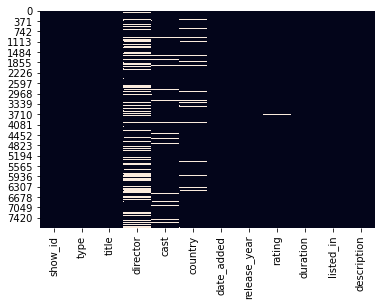

In [6]:
sns.heatmap(netflix.isnull() , cbar = False)

#### We don't need Director,Cast from the Dataset to visualize & sincce these two column has missing values ,so we can drop them.

In [7]:
netflix.drop(["director" , "cast"] , axis=1 , inplace=True)

#### Rename the date_added column.

In [8]:
netflix.columns = netflix.columns.str.replace("date_added" , "release_date")

In [9]:
pd.options.display.max_rows = None

<IPython.core.display.Javascript object>

### Data Preprocessing and fill missing value.

##### country column have 682 unique names.

In [10]:
netflix["country"].unique().size

682

In [11]:
netflix["country"].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

### In country column data is inaccurate also. In country column several country names are written in each row.

In [12]:
netflix["country"].value_counts(dropna=False)

United States                                                                                                                  2555
India                                                                                                                           923
NaN                                                                                                                             507
United Kingdom                                                                                                                  397
Japan                                                                                                                           226
South Korea                                                                                                                     183
Canada                                                                                                                          177
Spain                                                                       

In [13]:
netflix["country"].sample(50)

6780                              United States
560                                       India
6526                                     Brazil
7701                                      India
3607                              United States
5957                                      India
159                               United States
4992                                  Argentina
5758                              United States
7482                                     Mexico
333                                   Singapore
2391                                    Lebanon
3675                              United States
5789                              United States
3083                                South Korea
7081                              United States
232                               United States
6397                                        NaN
1141                              United States
680                                         NaN
2120                              United

In [14]:
netflix["country"].tail(10)

7777                                                  NaN
7778                                        United States
7779                                               Mexico
7780                                                India
7781                                        United States
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, dtype: object

### now country column look good each row have single country name .

In [15]:
netflix["country"].str.split(",").str[0]

0                     Brazil
1                     Mexico
2                  Singapore
3              United States
4              United States
5                     Turkey
6                      Egypt
7              United States
8                      India
9                      India
10             United States
11                    Poland
12                    Mexico
13                  Thailand
14             United States
15                   Nigeria
16                       NaN
17                    Norway
18                     India
19            United Kingdom
20                     India
21                     India
22                     India
23                     India
24                     Japan
25             United States
26             United States
27               South Korea
28                     Italy
29             United States
30                    Canada
31                 Indonesia
32                 Indonesia
33             United States
34            

#### Now update country column

In [16]:
netflix["country"] = netflix["country"].str.split(",").str[0]

### reduce country names from 607 to 82 which looks great. 

In [17]:
netflix["country"].unique().size

82

In [18]:
netflix["country"].value_counts(dropna=False).head(10)

United States     2883
India              956
United Kingdom     577
NaN                507
Canada             259
Japan              237
France             196
South Korea        194
Spain              168
Mexico             123
Name: country, dtype: int64

#### We replace the Nan values with 'United States' since Netflix is originated from United Statesand most of the movies and TV shows are aired in there. Statistically, looking at the mode of the country column also confirm that 'United States'can be a great replacement for the missing values.

In [19]:
netflix["country"].mode()[0]

'United States'

In [20]:
netflix["country"] = netflix["country"].fillna(netflix["country"].mode()[0])

#### Now country column is full filled and looks great.

In [21]:
netflix["country"].head(10)

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
6            Egypt
7    United States
8            India
9            India
Name: country, dtype: object

### Fix missing values from rating column.

In [22]:
netflix[netflix["rating"].isnull()]

,show_id,type,title,country,release_date,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


#### There are 7 null values in the rating column.

In [23]:
netflix["rating"].value_counts(dropna=False)

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
NaN            7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

#### Search from Google the which Movies or TV shows lies in which rating category and then manually put in the dataframe.

In [24]:
netflix.loc[netflix["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay" , "rating"] = 'TV-PG'
netflix.loc[netflix["title"] == "Gargantia on the Verdurous Planet" , "rating"] = 'TV-G'
netflix.loc[netflix["title"] == "Little Lunch" , "rating"] = 'TV-MA'
netflix.loc[netflix["title"] == "Louis C.K. 2017" , "rating"] = 'TV-MA'
netflix.loc[netflix["title"] == "Louis C.K.: Hilarious" , "rating"] = 'TV-MA'
netflix.loc[netflix["title"] == "Louis C.K.: Live at the Comedy Store" , "rating"] = 'TV-MA'
netflix.loc[netflix["title"] == "My Honor Was Loyalty" , "rating"] ='PG-13'

#### Now see no Nan value in the rating column fill all nan values.

In [25]:
netflix["rating"].value_counts(dropna=False)

TV-MA       2867
TV-14       1931
TV-PG        807
R            665
PG-13        387
TV-Y         280
TV-Y7        271
PG           247
TV-G         195
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

#### Now no null value in the rating column.

In [26]:
netflix[netflix["rating"].isnull()]

,show_id,type,title,country,release_date,release_year,rating,duration,listed_in,description


### Now fix date_release column.

In [27]:
netflix[netflix["release_date"].isna()]

,show_id,type,title,country,release_date,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


###  release_date search from google.

In [28]:
netflix.loc[netflix["title"] == "A Young Doctor's Notebook and Other Stories" , "release_date"] = "December 6, 2012"
netflix.loc[netflix["title"] == "Anthony Bourdain: Parts Unknown" , "release_date"] = "April 14, 2013"
netflix.loc[netflix["title"] == "Frasier" , "release_date"] = "September 16, 1993"
netflix.loc[netflix["title"] == "Friends" , "release_date"] = "September 22, 1994"
netflix.loc[netflix["title"] == "Gunslinger Girl" , "release_date"] = "May 21, 2002"
netflix.loc[netflix["title"] == "Kikoriki" , "release_date"] = "May 17, 2004"
netflix.loc[netflix["title"] == "La Familia P. Luche" , "release_date"] = "November 29, 2002"
netflix.loc[netflix["title"] == "Maron" , "release_date"] = " May 3, 2013"
netflix.loc[netflix["title"] == "Red vs. Blue" , "release_date"] = "April 1, 2003"
netflix.loc[netflix["title"] == "The Adventures of Figaro Pho" , "release_date"] = "August 31, 2015"

In [29]:
netflix[netflix["release_date"].isnull()]

,show_id,type,title,country,release_date,release_year,rating,duration,listed_in,description


In [30]:
netflix["rating"].value_counts(dropna=False)

TV-MA       2867
TV-14       1931
TV-PG        807
R            665
PG-13        387
TV-Y         280
TV-Y7        271
PG           247
TV-G         195
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

### multiple listed categories are in single row which is not good and that effect our analysis .
###  In single row only one listed_in category are shown but there are multiple category combine there. 

In [31]:
netflix["listed_in"].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
Kids' TV                                                                           205
Children & Family Movies                                                           177
Documentaries, International Movies                                                172
Children & Family Movies, Comedies                                                 169
Comedies, International Movies                                                     161
Dramas, International Movies, Romantic Movies                                      153
Comedies, International Movies, Romantic Mo

In [32]:
netflix["listed_in"]

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
5         International TV Shows, TV Dramas, TV Mysteries
6                     Horror Movies, International Movies
7                                                  Dramas
8                     Horror Movies, International Movies
9          Horror Movies, International Movies, Thrillers
10                                      Dramas, Thrillers
11      Crime TV Shows, International TV Shows, TV Dramas
12      Crime TV Shows, Docuseries, International TV S...
13      Documentaries, International Movies, Sports Mo...
14        Independent Movies, Sci-Fi & Fantasy, Thrillers
15                Dramas, International Movies, Thrillers
16                      International TV Shows, TV Dramas
17            

### Now its look great. each row has single listed_in category.

In [33]:
netflix["listed_in"].str.split(",").str[0]

0             International TV Shows
1                             Dramas
2                      Horror Movies
3                 Action & Adventure
4                             Dramas
5             International TV Shows
6                      Horror Movies
7                             Dramas
8                      Horror Movies
9                      Horror Movies
10                            Dramas
11                    Crime TV Shows
12                    Crime TV Shows
13                     Documentaries
14                Independent Movies
15                            Dramas
16            International TV Shows
17                            Dramas
18                          Comedies
19                     Sports Movies
20                            Dramas
21                Action & Adventure
22                            Dramas
23                            Dramas
24                      Anime Series
25                     Documentaries
26                        Reality TV
2

In [34]:
netflix["listed_in"] = netflix["listed_in"].str.split(",").str[0]

### Now its look good each row has single listed name  and 'value_counts' of listed_in column increasing so much compare with the upper value_counts cell. 

In [35]:
netflix["listed_in"].value_counts()[:10]

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
International TV Shows       690
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     359
Stand-Up Comedy              321
Horror Movies                244
Name: listed_in, dtype: int64

### Now see no nan values see out there all nan values is filled.

In [36]:
netflix.isnull().sum()

show_id         0
type            0
title           0
country         0
release_date    0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<IPython.core.display.Javascript object>

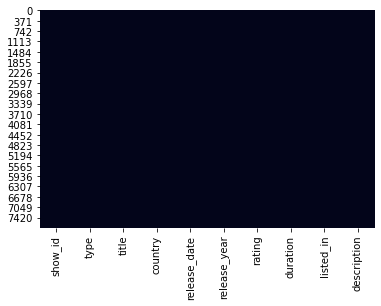

In [37]:
sns.heatmap(netflix.isnull() , cbar = False)

In [38]:
netflix.drop(["release_year"] , axis = 1 , inplace=True)

### year and the month from release_date so we can compare wich are the most valueable months and the difference between Show realse and Netflix adding dates/

In [39]:
netflix["release_year"] = netflix["release_date"].apply(lambda x : x.split(" ")[-1])

In [40]:
netflix["release_month"] = netflix["release_date"].apply(lambda x : x.split()[0])

In [41]:
netflix.head()

,show_id,type,title,country,release_date,rating,duration,listed_in,description,release_year,release_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,"November 16, 2017",PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


In [42]:
netflix.dtypes

show_id          object
type             object
title            object
country          object
release_date     object
rating           object
duration         object
listed_in        object
description      object
release_year     object
release_month    object
dtype: object

In [43]:
netflix["release_year"] = pd.to_numeric(netflix["release_year"])

<IPython.core.display.Javascript object>

### Data Visualization

In [44]:
netflix["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

#### It is evident that there are more Movies on Netflix than TV shows.

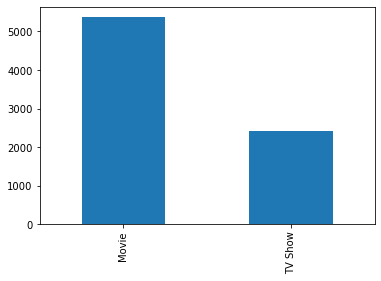

In [45]:
netflix["type"].value_counts().plot.bar()

<IPython.core.display.Javascript object>

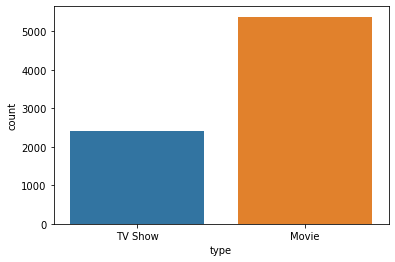

In [46]:
sns.countplot(x = "type" , data = netflix)

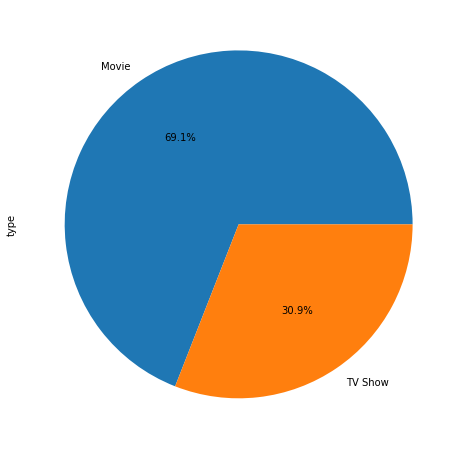

In [47]:
netflix["type"].value_counts().plot(kind = "pie" ,figsize=(8,8),autopct='%1.1f%%')

#### The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines television program that was designed for mature audiences only.

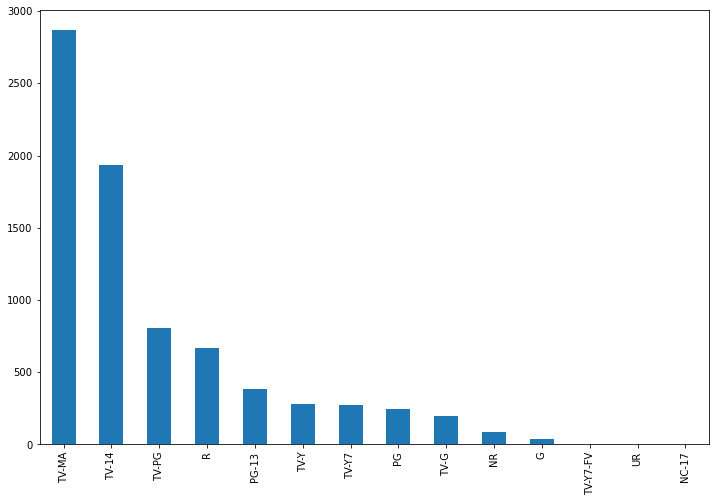

In [48]:
netflix["rating"].value_counts().plot.bar(figsize = (12,8))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

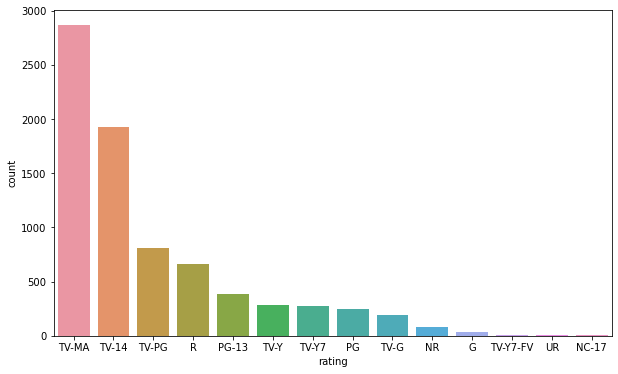

In [49]:
plt.figure(figsize = (10,6))
sns.countplot(x = "rating" , data = netflix , order = netflix["rating"].value_counts().index[:14])

#### As rating wise clearly shown in the graph mostly movies produce for mature people.
#### Intrested thing is that no tv show s is under_rating category means R , PG-13 , PG
#### Mostly tv shows produce for older kids like under 14.

In [50]:
# plt.figure(figsize = (12,8))
# sns.countplot(x='rating',data = netflix,hue='type')

### Top-20 countries producing maximum content:

In [51]:
netflix["country"].value_counts().head(20)

United States     3390
India              956
United Kingdom     577
Canada             259
Japan              237
France             196
South Korea        194
Spain              168
Mexico             123
Australia          108
Turkey             106
Egypt              105
Germany             92
China               86
Taiwan              82
Brazil              79
Hong Kong           77
Indonesia           76
Philippines         75
Nigeria             71
Name: country, dtype: int64

#### America , india , uk , canada , france , germany , japan is the top content producing contry.
#### In this graph both tvshows and movies are included .

<IPython.core.display.Javascript object>

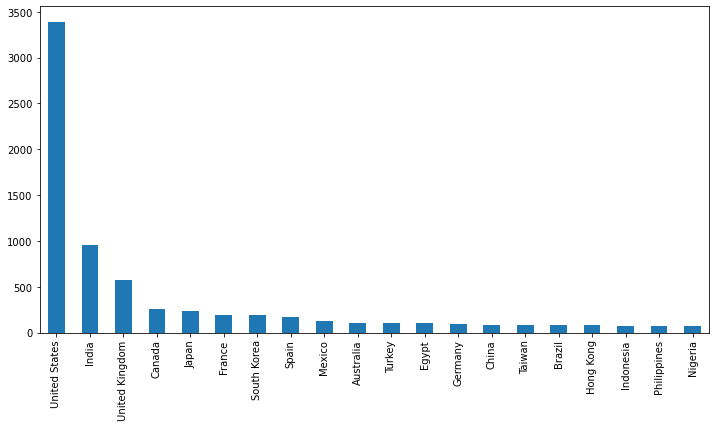

In [52]:
fig = plt.figure(figsize = (12,6))
netflix["country"].value_counts().head(20).plot.bar()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

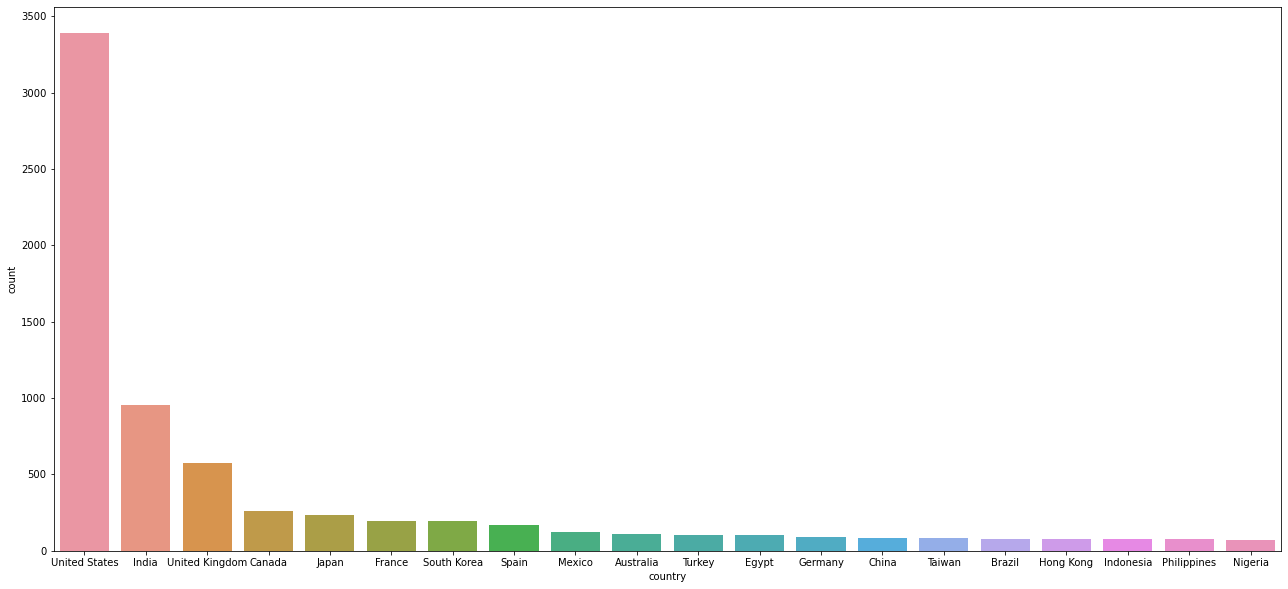

In [53]:
plt.figure(figsize = (22,10))
sns.countplot(x = "country" , data = netflix , order = netflix["country"].value_counts().index[:20])

#### We can see that US, India, United Kingdom, Canada and France contribute 75% of the top20 countries.

<IPython.core.display.Javascript object>

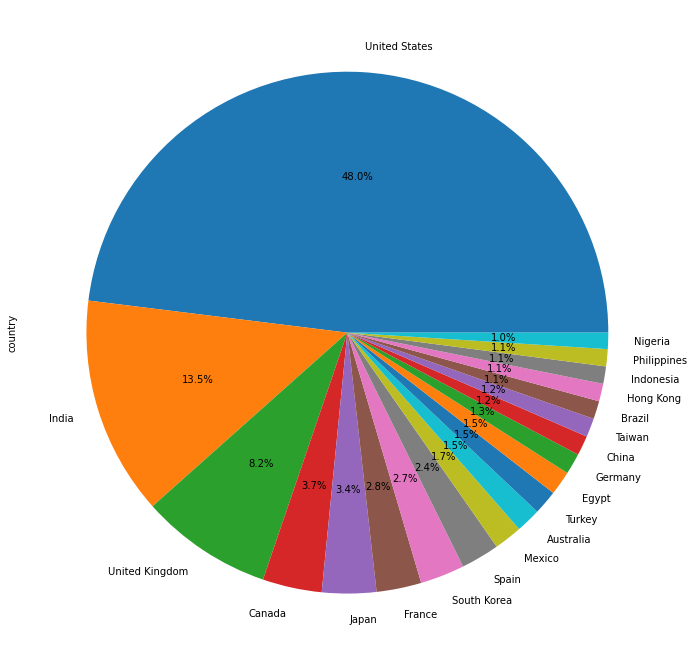

In [54]:
plt.figure(figsize = (24,12))
netflix["country"].value_counts().head(20).plot.pie(autopct='%1.1f%%')

#### seaparate the tvshow and movies into two dataframes for better analysis.

In [55]:
netflix_movies = netflix[netflix['type'] == 'Movie']
netflix_tv_shows = netflix[netflix['type'] == 'TV Show']

In [56]:
netflix_movies.shape

(5377, 11)

In [57]:
 netflix_tv_shows.shape

(2410, 11)

#### from 2016 to 2020 mostly contents has been produced both types are included.

In [58]:
netflix["release_year"].value_counts()

2019    2153
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      89
2014      25
2013      13
2011      13
2012       4
2002       2
2009       2
2008       2
2010       1
1994       1
1993       1
2003       1
2004       1
Name: release_year, dtype: int64

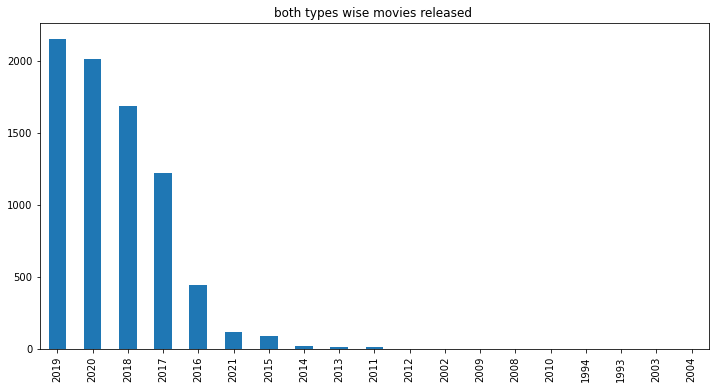

In [59]:
netflix["release_year"].value_counts().plot.bar(figsize = (12,6), title = "both types wise movies released ")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

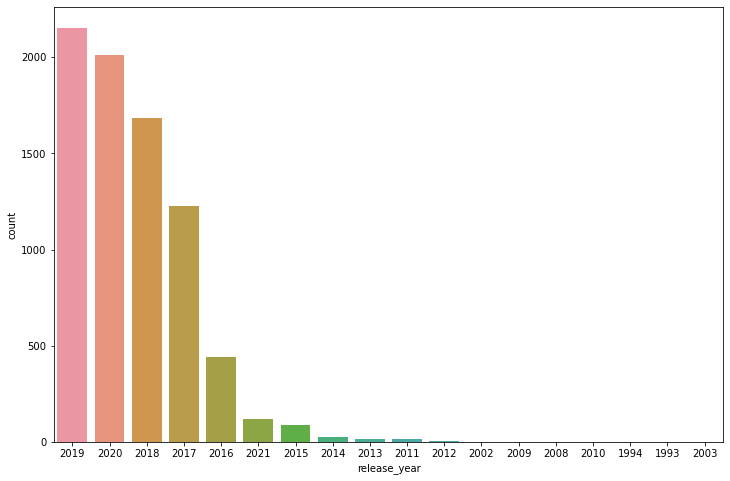

In [60]:
 plt.figure(figsize = (12,8))
sns.countplot(x = "release_year" , data = netflix , order = netflix["release_year"].value_counts().index[:18])

#### In 2020 maximum tv shows has been releases as compared to other year.

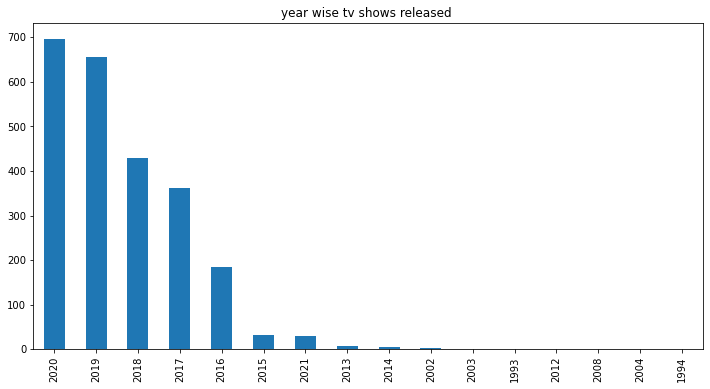

In [61]:
netflix_tv_shows["release_year"].value_counts().plot.bar(figsize = (12,6), title = "year wise tv shows released ")

#### In 2020 and 2019 maximum movies has been releases as compared to other year.
#### About 1200  new movies were added in both 2019 and 2020 year.

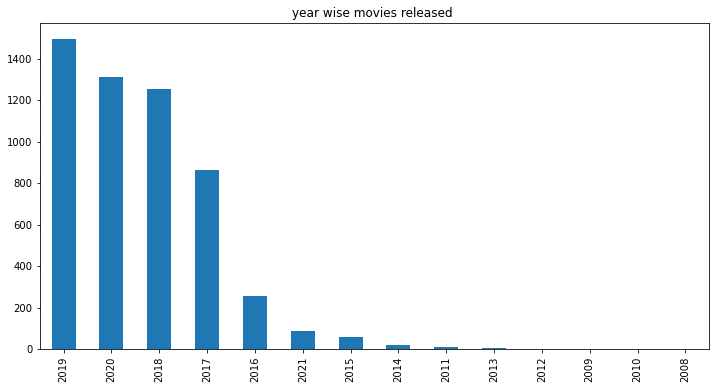

In [62]:
netflix_movies["release_year"].value_counts().plot.bar(figsize = (12,6), title = "year wise movies released ")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

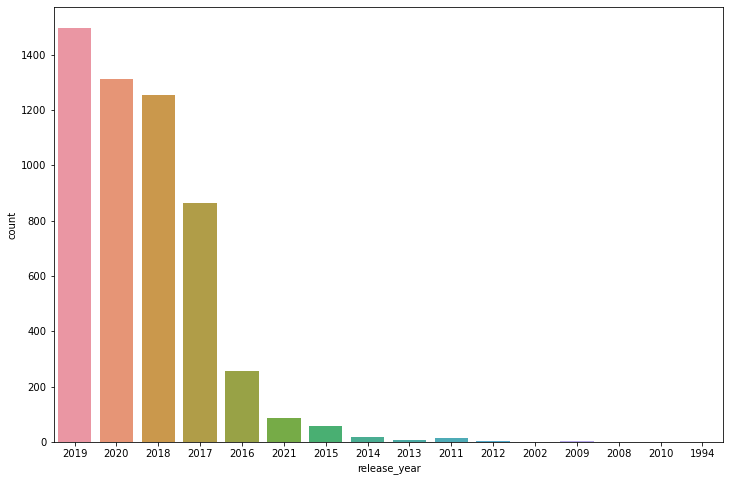

In [63]:
plt.figure(figsize = (12,8))
sns.countplot(x = "release_year" , data = netflix_movies , order = netflix["release_year"].value_counts().index[:16])

#### The growth in contents are higher the last three months and the first month of the year both type are included.
#### In December maximum content has been releases.
#### Least  number of contents are release in the month of February.

In [64]:
netflix["release_month"].value_counts()

December     834
October      785
January      757
November     739
March        669
September    621
August       619
April        603
July         600
May          546
June         542
February     472
Name: release_month, dtype: int64

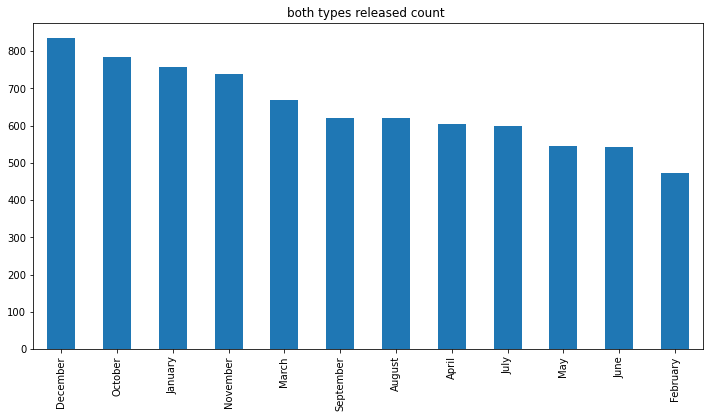

In [65]:
netflix["release_month"].value_counts().plot.bar(figsize = (12,6), title = "both types released count ")

#### The growth rate of tv shows contents are higher in the last four months of the year.
#### In the month of december maximum tv shows are released.

In [66]:
netflix_tv_shows["release_month"].value_counts()

December     280
October      232
November     228
September    206
August       205
March        198
January      197
July         197
April        183
May          175
June         165
February     144
Name: release_month, dtype: int64

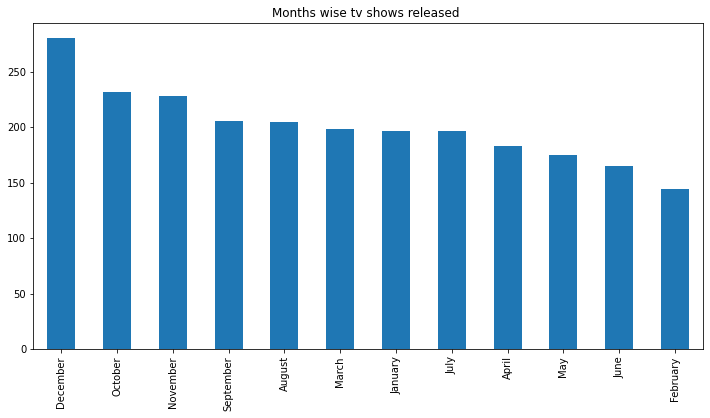

In [67]:
netflix_tv_shows["release_month"].value_counts().plot.bar(figsize = (12,6), title = "Months wise tv shows released ")

#### The growth rate of movies contents are higher in the  first and last three months of the year.
#### In the month of January maximum movies are released.

In [68]:
netflix_movies["release_month"].value_counts()

January      560
December     554
October      553
November     511
March        471
April        420
September    415
August       414
July         403
June         377
May          371
February     328
Name: release_month, dtype: int64

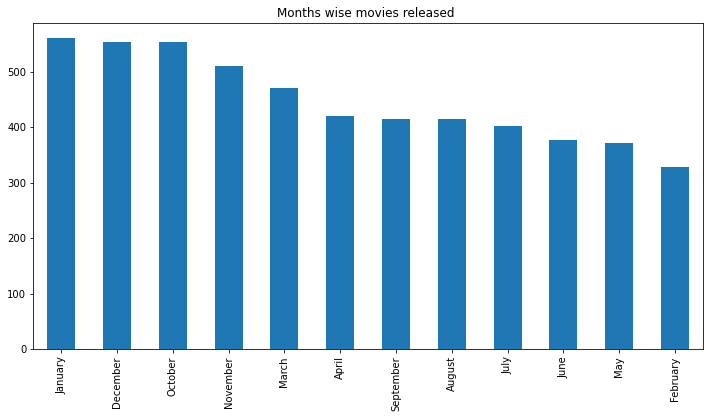

In [69]:
netflix_movies["release_month"].value_counts().plot.bar(figsize = (12,6) , title = "Months wise movies released ")

In [70]:
netflix.head()

,show_id,type,title,country,release_date,rating,duration,listed_in,description,release_year,release_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,"November 16, 2017",PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


#### Top 20 listed_in category in tv_shows .

In [71]:
netflix_tv_shows["listed_in"].value_counts().head(20)

International TV Shows          690
Crime TV Shows                  369
Kids' TV                        359
British TV Shows                232
Docuseries                      194
Anime Series                    148
TV Comedies                     110
Reality TV                      102
TV Dramas                        62
TV Action & Adventure            37
Stand-Up Comedy & Talk Shows     33
Romantic TV Shows                28
Classic & Cult TV                21
TV Shows                         12
TV Horror                        10
Spanish-Language TV Shows         2
TV Sci-Fi & Fantasy               1
Name: listed_in, dtype: int64

## International tv show , crime tvshow , kid tvshows are top tvshows category in netflix

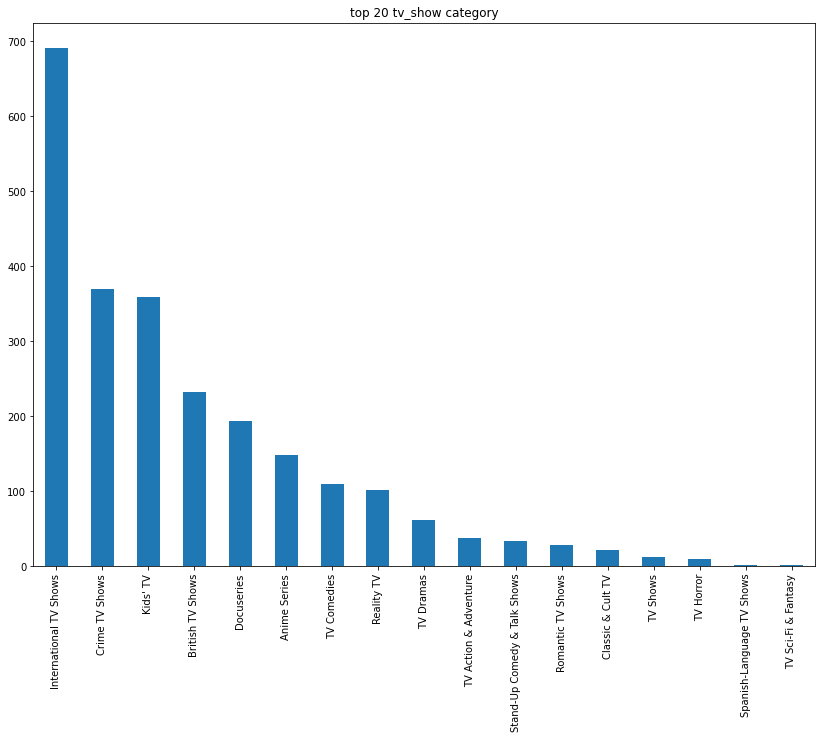

In [72]:
netflix_tv_shows["listed_in"].value_counts().head(20).plot.bar(figsize = (14,10) , title = "top 20 tv_show category")

## Top 20 listed_in category in movies.

In [73]:
netflix_movies["listed_in"].value_counts().head(20)

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
Children & Family Movies     502
Stand-Up Comedy              321
Horror Movies                244
International Movies         114
Classic Movies                77
Movies                        56
Thrillers                     49
Independent Movies            20
Anime Features                19
Music & Musicals              17
Cult Movies                   12
Sci-Fi & Fantasy              11
Romantic Movies                3
Sports Movies                  1
LGBTQ Movies                   1
Name: listed_in, dtype: int64

## Dramas  , Comedians , Documentries are top movies category in Netflix 

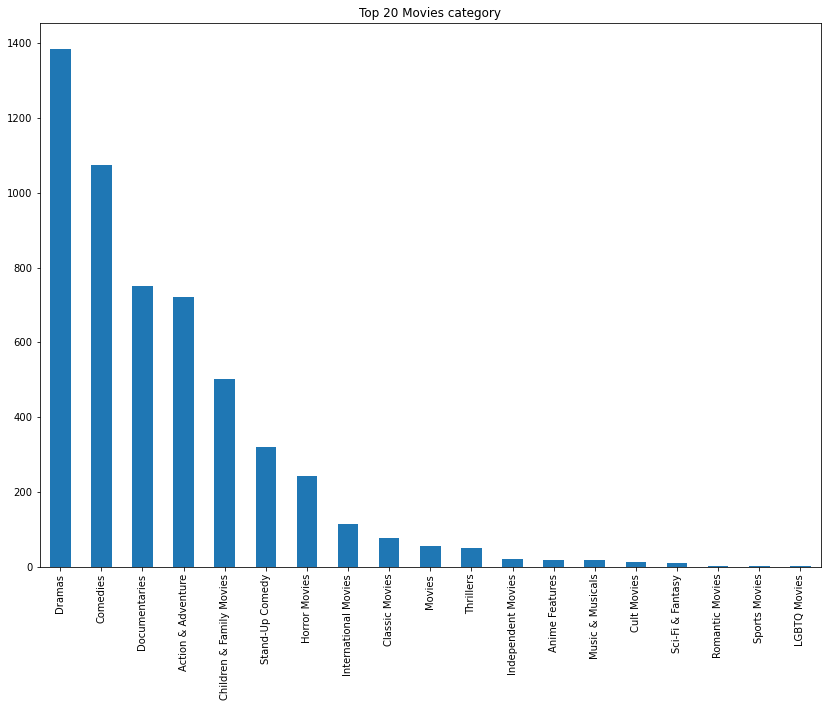

In [74]:
netflix_movies["listed_in"].value_counts().head(20).plot.bar(figsize = (14,10) , title = "Top 20 Movies category")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

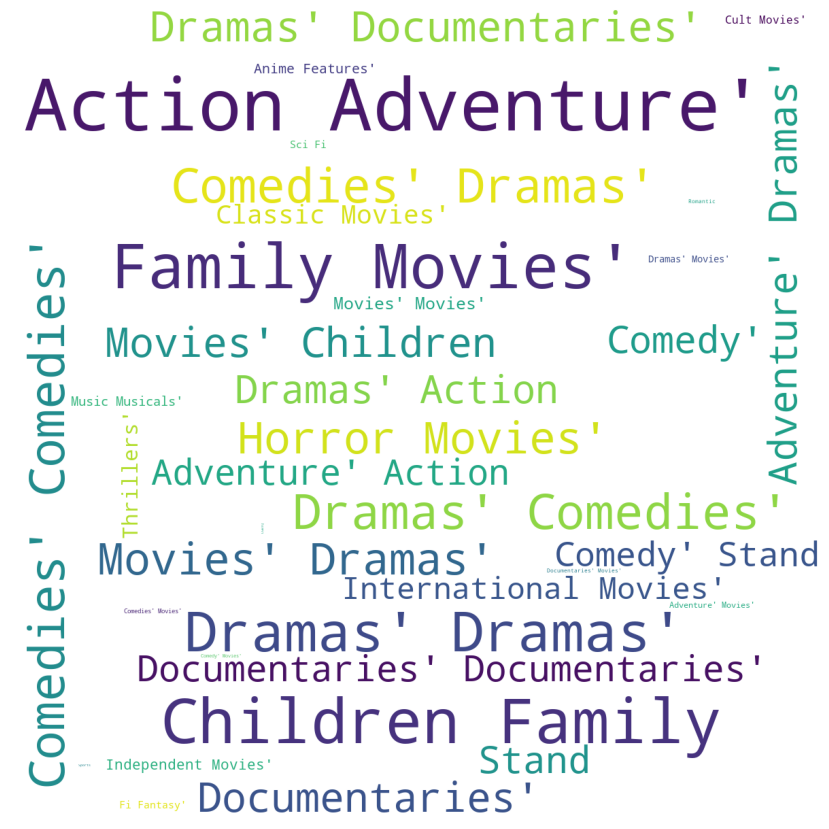

In [75]:
from wordcloud import WordCloud

text = str(list(netflix_movies['listed_in']))
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Maximum movies content are for Mature people as compared to other rating category.

In [76]:
netflix_movies['rating'].value_counts()

TV-MA       1848
TV-14       1272
R            663
TV-PG        506
PG-13        387
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rating, dtype: int64

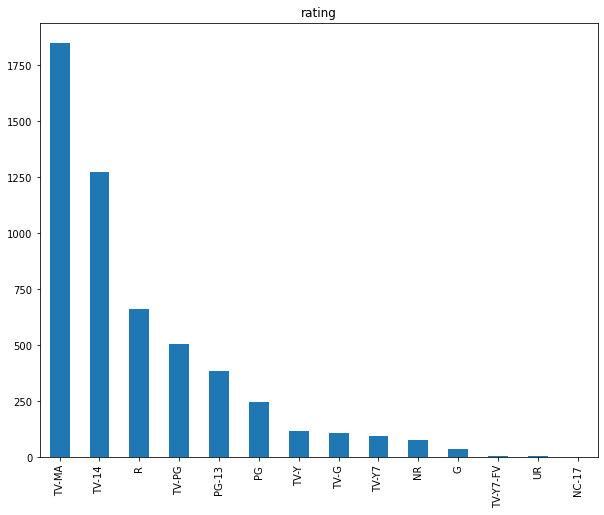

In [77]:
netflix_movies['rating'].value_counts().plot.bar(figsize = (10,8) , title = "rating")

In [78]:
netflix_tv_shows['rating'].value_counts()

TV-MA       1019
TV-14        659
TV-PG        301
TV-Y7        176
TV-Y         163
TV-G          84
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

####  Maximum tv_shows content are for mature people and teens as compare to other rating category.

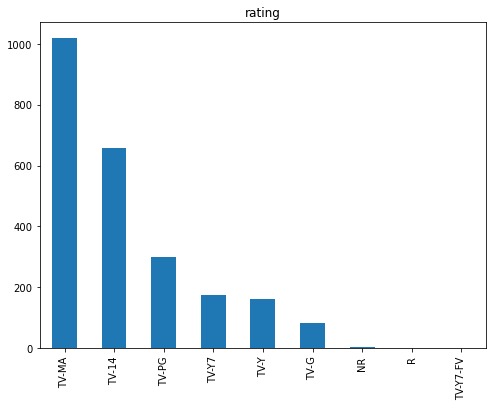

In [79]:
netflix_tv_shows['rating'].value_counts().plot.bar(figsize = (8,6) , title = "rating")

## Form the plot we can say that majority of the movies have duration between 85 min to 120 min.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

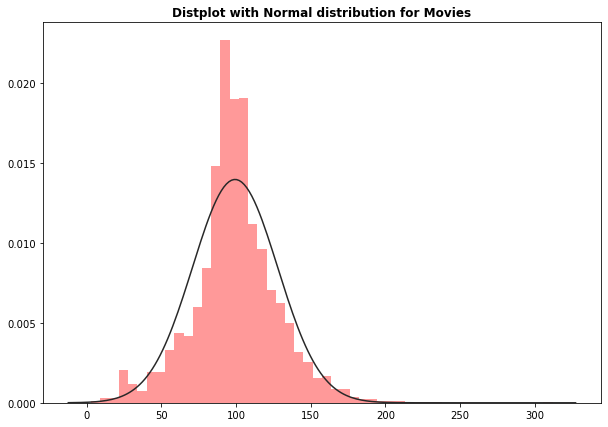

In [80]:
from scipy.stats import norm

plt.figure(figsize=(10,7))
sns.distplot(netflix_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

## Duration analysis
### This values are in term of seasons, so there is no much to analyze.

In [81]:
netflix_tv_shows["duration"].value_counts()

1 Season      1608
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
13 Seasons       2
12 Seasons       2
15 Seasons       2
16 Seasons       1
Name: duration, dtype: int64

## As we can see the most of the Tvshows are only 1 season probably becasuse they were cancelled or they are new and the second one is in production.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

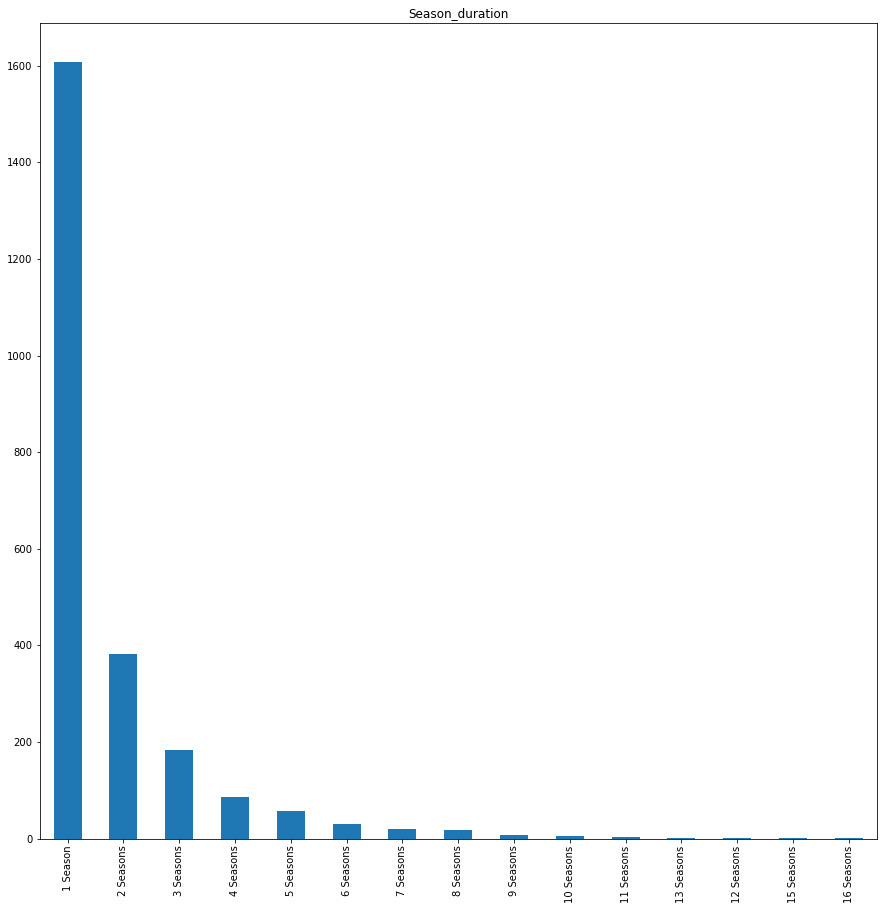

In [82]:
netflix_tv_shows["duration"].value_counts().plot.bar()
plt.title("Season_duration")
plt.show()

### If you like my notebook intrested plz upvote .